In [1]:
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from scipy.stats import poisson, binom
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

# Распределения 

## 1. Распределение Пуассона

Распределе́ние Пуассо́на — распределение дискретной случайной величины, представляющей собой число событий, произошедших за фиксированное время, при условии, что данные события происходят с некоторой фиксированной средней интенсивностью и независимо друг от друга.

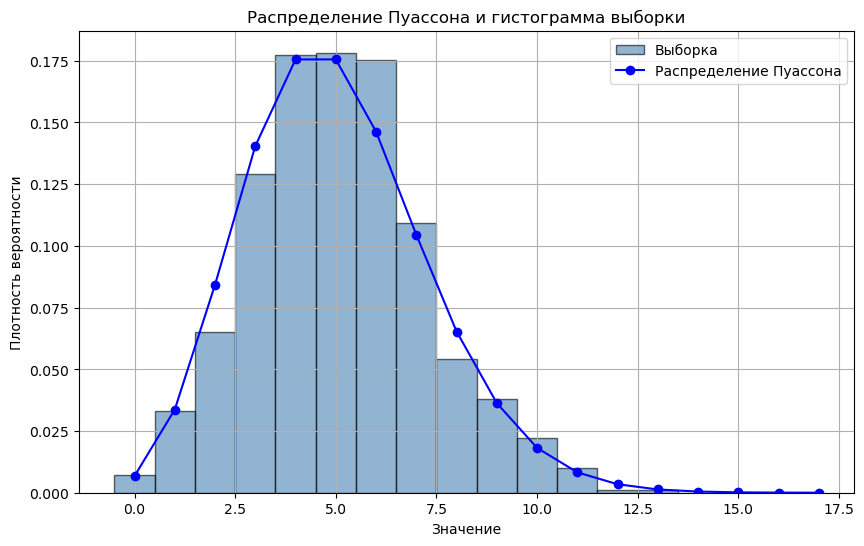

In [3]:
# Параметры распределения Пуассона
mu = 5  # Среднее значение распределения
n = 1000  # Число выборок

# Генерация выборки из распределения Пуассона
# data = np.random.poisson(lambda_param, n)
data = poisson.rvs(mu=mu, size=n)

# Генерация значений для оси X
x = np.arange(0, np.max(data) + 1)

# Вычисление плотности вероятности для распределения Пуассона
pmf = poisson.pmf(x, mu)

# Построение гистограммы выборки и графика плотности вероятности
plt.figure(figsize=(10, 6))

# Построение гистограммы выборки
plt.hist(data, bins=np.arange(0, np.max(data) + 1) - 0.5, density=True, alpha=0.6, color='steelblue', edgecolor='black', label='Выборка')

# Построение графика плотности вероятности
plt.plot(x, pmf, color='blue', marker='o', linestyle='-', label='Распределение Пуассона')

plt.title('Распределение Пуассона и гистограмма выборки')
plt.xlabel('Значение')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid(True)
plt.show()

## 2. Биноминальное распределение

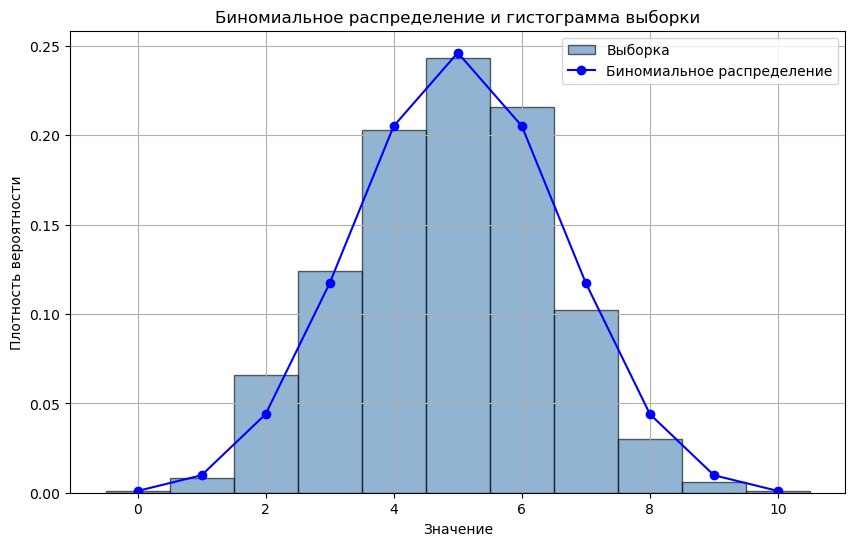

In [4]:
# Параметры биномиального распределения
n_trials = 10
p_success = 0.5
sample_size = 1000

# Генерация выборки из биномиального распределения с помощью scipy.stats.binom
data = binom.rvs(n=n_trials, p=p_success, size=sample_size)

# Генерация значений для оси X
x = np.arange(0, n_trials + 1)

# Вычисление плотности вероятности для биномиального распределения
pmf = binom.pmf(x, n=n_trials, p=p_success)

# Построение гистограммы выборки и графика плотности вероятности
plt.figure(figsize=(10, 6))

# Построение гистограммы выборки
plt.hist(data, bins=np.arange(-0.5, n_trials + 1.5, 1), density=True, alpha=0.6, color='steelblue', edgecolor='black', label='Выборка')

# Построение графика плотности вероятности
plt.plot(x, pmf, color='blue', marker='o', linestyle='-', label='Биномиальное распределение')

plt.title('Биномиальное распределение и гистограмма выборки')
plt.xlabel('Значение')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid(True)
plt.show()

## 3. Нормальное распределение

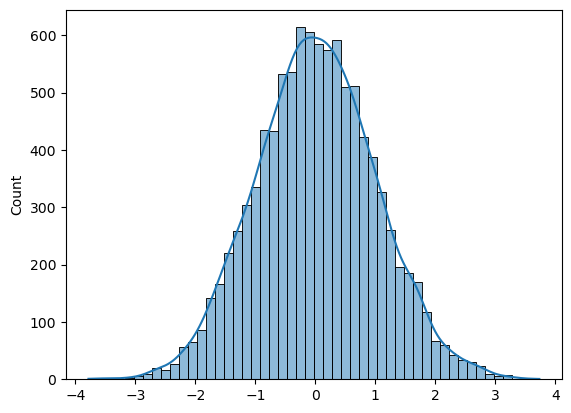

In [117]:
from numpy.random import normal
import matplotlib.pyplot as plt
import seaborn as sns

norm = normal(size=10000)
sns.histplot(norm, kde=True, bins=50)

plt.show()

### проверка на нормальность

P-value — вероятность получить для данной вероятностной модели распределения значений случайной величины такое же или более экстремальное значение статистики (среднего арифметического, медианы и др.), по сравнению с ранее наблюдаемым, при условии, что нулевая гипотеза верна.

H0 - основная гипотеза --- показатель имеет нормальное распределение  
H1 - альтернативная  --- альтенативная гипотезе Н0

In [113]:
from scipy import stats

norm = normal(size=20)
# norm = poisson.rvs(mu=3, size=20)
k2, p = stats.normaltest(norm)

if p < 0.05:  # null hypothesis: x comes from a normal distribution
    print(f"{bcolors.FAIL}Нулевая гипотеза отклонена, распределение показателя отлично от нормального{bcolors.ENDC}")
else:
    print(f"{bcolors.OKGREEN}Нулевая гипотеза не может быть отклонена, распределение показателя можно считать нормальным{bcolors.ENDC}")

print(p)

Нулевая гипотеза не может быть отклонена, распределение показателя можно считать нормальным
0.840597333689779


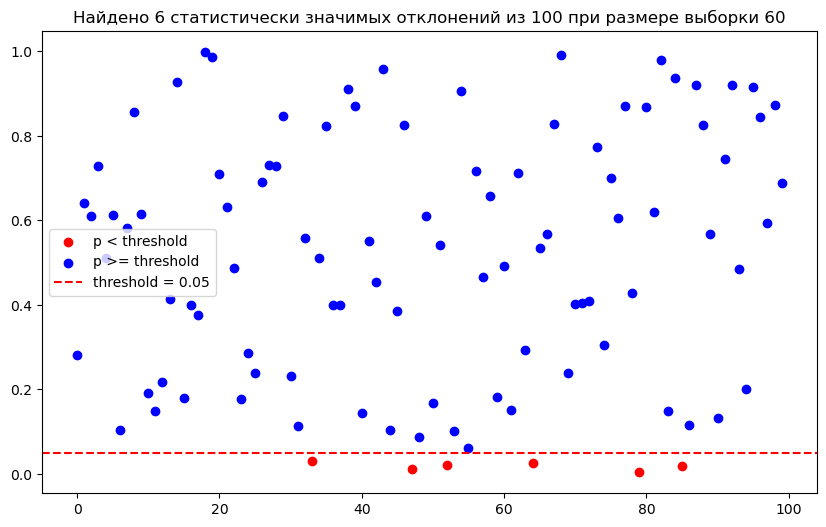

In [121]:
num = 100
size = 60
p = np.zeros(num)
for i in range(num):
    p[i] = stats.normaltest(normal(size=size))[1]

threshold = 0.05          # Пороговое значение

# Создание булевого массива для точек ниже порога
below_threshold = p < threshold

# Построение графика
plt.figure(figsize=(10, 6))

# Рисование точек, которые ниже порога, красным цветом
plt.scatter(np.arange(len(p))[below_threshold], p[below_threshold], color='red', label='p < threshold')

# Рисование остальных точек синим цветом
plt.scatter(np.arange(len(p))[~below_threshold], p[~below_threshold], color='blue', label='p >= threshold')

plt.axhline(threshold, color='red', linestyle='--', label=f'threshold = {threshold}')
plt.legend()
plt.title(f'Найдено {np.sum(below_threshold)} статистически значимых отклонений из {num} при размере выборки {size}')
plt.show()